In [1]:
import pandas as pd
import numpy as np
from scipy.io.arff import loadarff
import clustering
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import testing

In [39]:
import csv

data = []
species = []
all_states = set()
with open('datasets/plants.data', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        species.append(row[0])
        all_states = all_states.union(row[1:])
        data.append(row[1:])

In [33]:
len(all_states)

70

In [37]:
df = pd.DataFrame(species, columns=['Species'])

In [41]:
for state in all_states:
    df[state] = 0

In [52]:
for i in range(len(df.index)):
    for d in data[i]:
        df.at[i, d] = 1

In [57]:
df

,Species,sd,ma,nc,gl,md,ok,ut,lb,in,...,mn,ia,hi,nm,ks,id,me,sk,dc,pe
0,abelia,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,abelia x grandiflora,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,abelmoschus,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,abelmoschus esculentus,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,abelmoschus moschatus,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34776,zuckia brandegeei var. plummeri,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
34777,zygophlebia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34778,zygophlebia sectifrons,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34779,zygophyllum,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0


In [58]:
y = df['Species']
X = df.drop(['Species'], axis=1)

In [59]:
nbc = clustering.NBC(method='optimized')
nbc.fit(X)

In [73]:
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Utworzenie obiektu PCA i zastosowanie do danych
pca = PCA(n_components=2)  # Liczba składowych głównych, na które chcesz zredukować
pca_result = pca.fit_transform(scaled_data)

# Utwórz nowy DataFrame z wynikami PCA
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Wyświetl DataFrame po redukcji wymiarowości
print(pca_df)

            PC1       PC2
0     -2.363354 -0.996447
1     -2.363354 -0.996447
2      1.743434 -4.566878
3      1.698332 -4.487602
4     -2.857077 -0.438016
...         ...       ...
34776 -2.075215  1.378522
34777 -2.902179 -0.358739
34778 -2.902179 -0.358739
34779 -0.167723  1.880735
34780 -0.167723  1.880735

[34781 rows x 2 columns]


In [80]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34781 entries, 0 to 34780
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     34781 non-null  float64
 1   PC2     34781 non-null  float64
dtypes: float64(2)
memory usage: 543.6 KB


In [81]:
elements_amount = 10000
X_mod = X.iloc[:elements_amount]
y_mod = y[:elements_amount]

In [97]:
reload(clustering)
import clustering

In [98]:
nbc = clustering.NBC(method='optimized')
nbc.fit(X_mod)

In [105]:
enc = LabelEncoder()
y_mod = enc.fit_transform(y_mod)

In [110]:
adjusted_rand_score(nbc.predict(X_mod, 10), y_mod)

0.0

Najlepsza wartość parametru k:  0
Najlepsza wartość metryki ewaluacji:  0.0


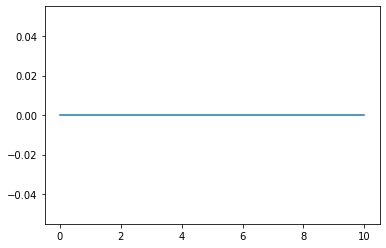

In [99]:
best_k, score = testing.find_best_predictions(X_mod, y_mod, nbc, max_range=40)
print('Najlepsza wartość parametru k: ', best_k)
print('Najlepsza wartość metryki ewaluacji: ', score)